In [1]:
# named imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# unnamed imports
import os 
import re

# imported functions
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [2]:
df = pd.read_csv("../data/raw/retail_2010_2011.csv", sep=",", encoding="latin-1")
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.describe(include="object")

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [7]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

541909 entries
8 features (5 categorical, 3 numerical)
- categorical features
    * ```InvoiceNo:``` object, 25900 unique entries,   no null     - Number of the invoice for a purchase
    * ```Stockcode:``` object, 4070 unique entries,    no null     - Identificationnumber for each product in stock
    * ```Description:``` object, 4223 unique entries,    1454 null   - Name or description of the product
    * ```InvoiceDate:``` object, 23260 unique entries,   no null     - timestamps of the purchased product
    * ```Country:``` object, 38 unique entries,      no null     - Name of the country the product waas purchased in
- numerical features
    * ```Quantity:``` int64,  mean 9.55 std 218,      no null     - amount of product
    * ```UnitPrice:``` float,  mean 4.61 std 97,       no null     - Price for each product
    * ```CustomerID:``` float,  4372 unique entries,    135080 null - Identificationnumber for each customer

In [9]:
df.isnull().sum() / df.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

The raw dataset has to be processed to fill or drop NaNs, and to handle outliers and extrem values.

Description has no value for further analysis because the StockCode is a label for a certain product. Additionally the InvoiceDate can be changed to type datetime.

In [10]:
#df = df.drop('Description', axis=1)
#df.head()

In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


It is possible that the missing description get dropped with the CustomerID.

In [12]:
df = df.dropna(subset=['CustomerID'])
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

All NaN were removed and we continue with removing outliers.

In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
df_cleaned = df.drop_duplicates()
print(df_cleaned.duplicated().sum())

0


In [15]:
# indices_to_remove = []

# # Iteration über die Zeilen des DataFrame
# for i in range(len(df)):
#     if df_cleaned['InvoiceNo'][i].startswith('C'):
#         original_invoice = df_cleaned['InvoiceNo'][i][1:]  # Extrahiere die ursprüngliche Rechnungsnummer
#         if original_invoice in df_cleaned['InvoiceNo'].values:
#             indices_to_remove.append(df_cleaned.index[df_cleaned['InvoiceNo'] == original_invoice][0])
#             indices_to_remove.append(i)

# # Entfernen der ausgewählten Zeilen
# df_cancellation = df_cleaned.drop(indices_to_remove)

# print(df_cancellation)

In [16]:
# import re

# pattern = '^([^C]+)'
# df_cancel = df_cleaned[(df_cleaned['Quantity'] <= 0) | (df['UnitPrice'] <= 0.01)]
# df_cleaned = df_cleaned[~df_cleaned['InvoiceNo'].isin(df_cancel['InvoiceNo'])]
# print(df_cleaned.shape[0], '\n', df_cancel.shape[0])

In [17]:
# df_cancel2['InvoiceNo'] = df_cancel['InvoiceNo'].str.extract(pattern)[0]
# df_cancel_d = df_cleaned[df_cleaned['InvoiceNo'] == df_cancel2['InvoiceNo']]

In [18]:
df_cancel = df_cleaned[(df_cleaned['Quantity'] <= 0) | (df['UnitPrice'] <= 0.01)]
df_cleaned = df_cleaned[~df_cleaned.isin(df_cancel).all(axis=1)]
df_cleaned.shape[0]

C:\Users\User\AppData\Local\Temp\ipykernel_63620\2050458789.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cancel = df_cleaned[(df_cleaned['Quantity'] <= 0) | (df['UnitPrice'] <= 0.01)]


392688

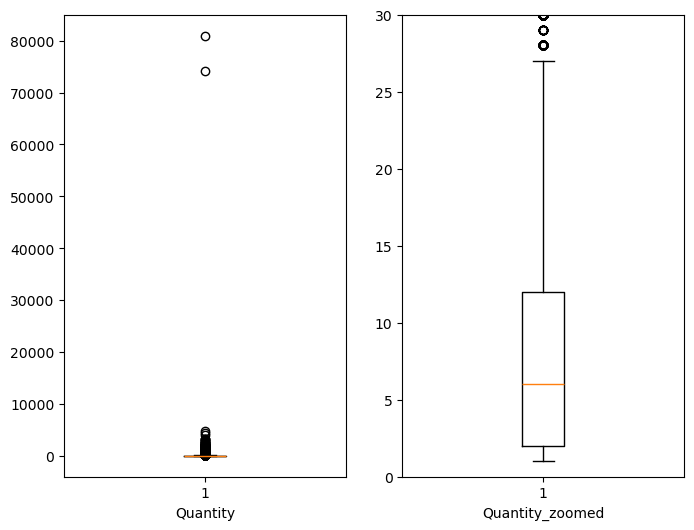

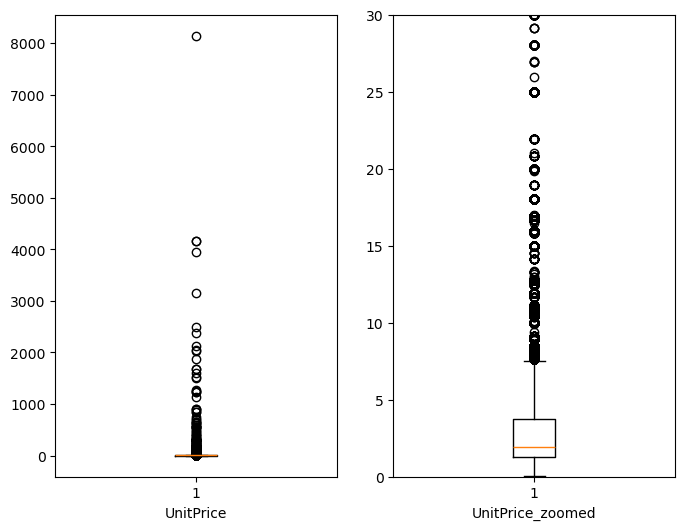

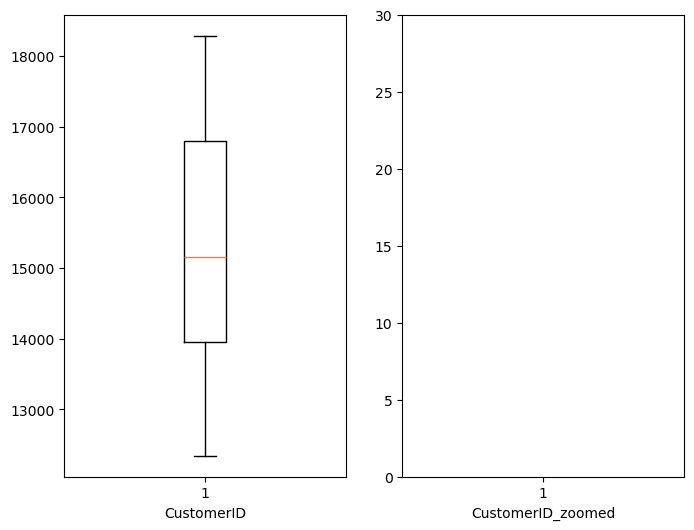

In [19]:
df_num = df_cleaned.select_dtypes(exclude=['object', 'datetime64'])
for col in df_num.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))
    ax1.boxplot(df_num[col])
    ax1.set_xlabel(col)

    ax2.boxplot(df_num[col])
    ax2.set_xlabel(col+'_zoomed')
    plt.ylim(0, 30)
    plt.show()

In [20]:
def remove_outlier(df, col):
    IQR = 0
    for i in col:
        IQR = np.quantile(df[i], 0.75) - np.quantile(df[i], 0.25)
        df = df[(df[i] >= 0.01) & ((df[i] > -1.5 * IQR) & (df[i] < 1.5 * IQR))]
    return df

In [21]:
df_cleand_outlier = remove_outlier(df_cleaned, ('Quantity', 'UnitPrice'))
df_cleand_outlier.describe()

,Quantity,UnitPrice,CustomerID
count,248022.000000,248022.000000,248022.000000
mean,5.927394,1.795659,15376.882990
std,4.226564,0.943980,1705.262997
min,1.000000,0.060000,12347.000000
25%,2.000000,1.250000,14056.000000
50%,5.000000,1.650000,15325.000000
75%,10.000000,2.460000,16898.000000
max,14.000000,4.000000,18287.000000


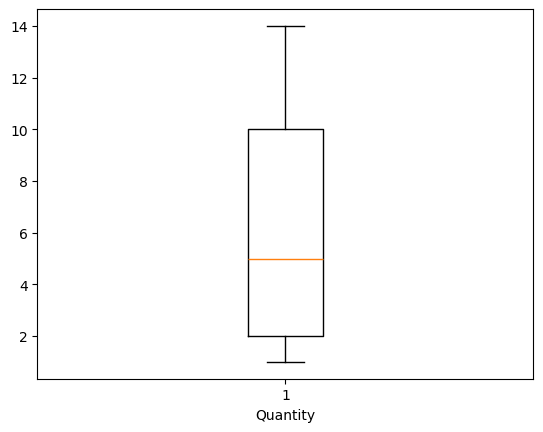

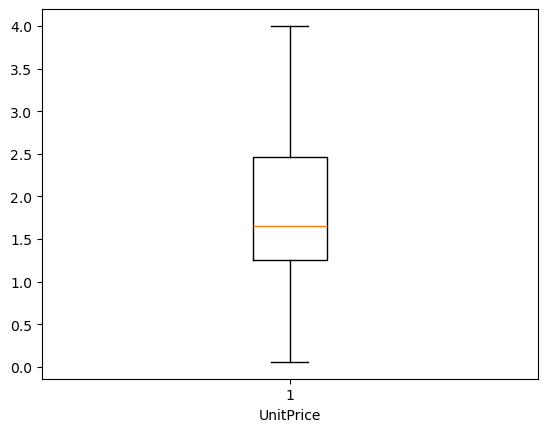

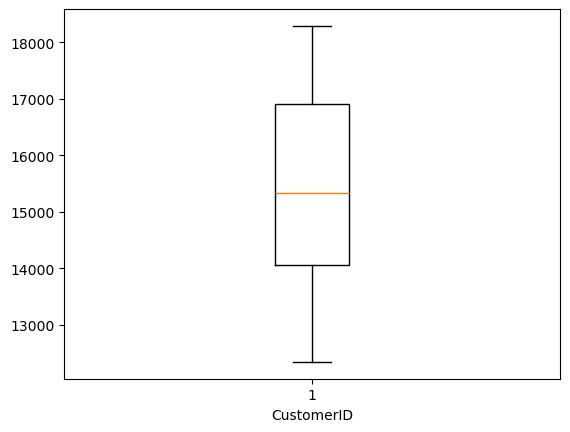

In [22]:
df_num = df_cleand_outlier.select_dtypes(exclude=['object', 'datetime64'])
for col in df_num.columns:
    plt.boxplot(df_num[col])
    plt.xlabel(col)
    plt.show()

First attempt:

An statistical approach with a groupby() by InvoiceID plus a value_count() on the grouped data can give a possible recommandation for a bundle.

In [23]:
df2 = df_cleaned.groupby(['CustomerID', 'InvoiceNo'])
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France


In [27]:
df_cleaned.sort_values('UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
381790,569893,16045,POPART WOODEN PENCILS ASST,200,2011-10-06 15:51:00,0.04,12627.0,Germany
228959,557006,16045,POPART WOODEN PENCILS ASST,100,2011-06-16 11:29:00,0.04,14282.0,United Kingdom
264630,560106,16045,POPART WOODEN PENCILS ASST,100,2011-07-14 20:01:00,0.04,17554.0,United Kingdom
427893,573405,16045,POPART WOODEN PENCILS ASST,100,2011-10-30 15:55:00,0.04,13822.0,United Kingdom
217060,555876,16045,POPART WOODEN PENCILS ASST,100,2011-06-07 15:28:00,0.04,15799.0,United Kingdom
...,...,...,...,...,...,...,...,...
374542,569382,M,Manual,1,2011-10-03 16:44:00,3155.95,15502.0,United Kingdom
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744.0,Singapore
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536.0,France
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536.0,France


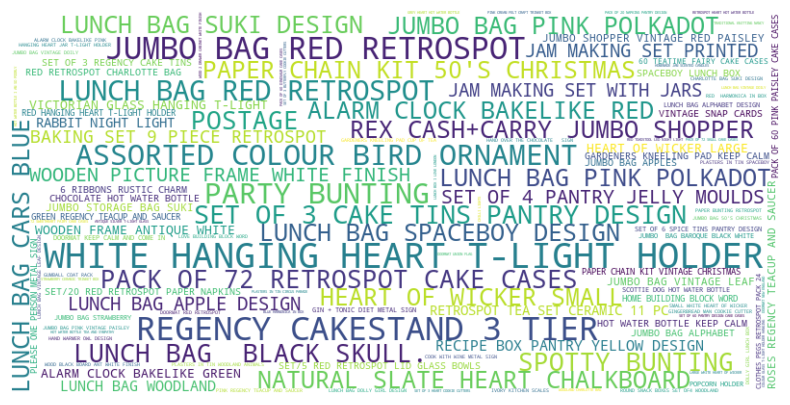

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Annahme: 'df' ist dein DataFrame mit den Daten
# Du kannst 'Description' oder eine andere kategoriale Variable verwenden

# Zähle die Häufigkeit der Werte in der kategorialen Spalte
word_counts = df_cleaned['Description'].value_counts()

# Erstelle eine Word Cloud aus den Häufigkeiten
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Zeige die Word Cloud an
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
from itertools import combinations
from collections import Counter, defaultdict

# Annahme: 'df' ist dein DataFrame mit den Daten

# Gruppiere die Daten nach CustomerID und InvoiceNo
grouped = df_cleaned.groupby(['CustomerID', 'InvoiceNo'])

# Funktion zum Sammeln von gekauften Artikeln und ihren Mengen pro Rechnung
def collect_items_quantity(items):
    return Counter(zip(items['StockCode'], items['Quantity']))

# Sammle gekaufte Artikel und Mengen pro Rechnung
invoice_items_quantities = grouped.apply(collect_items_quantity)

# Funktion zur Identifizierung von möglichen Bundles
def identify_bundles(items_quantities):
    bundles = []
    items = list(items_quantities.keys())
    for bundle in combinations(items, 2):  # Ändere 2 auf 3 für Kombinationen von 3 Elementen
        total_quantity = sum([qty for _, qty in bundle])  # Entferne [0] und [1]
        if total_quantity >= 2:
            bundles.append(tuple(sorted(bundle)))
    return bundles

# Identifiziere Bundles für jede Rechnung
bundles_per_invoice = invoice_items_quantities.apply(identify_bundles)

bundle_counts = defaultdict(int)

# Zähle die Häufigkeit jeder Bundle-Kombination
for bundles in bundles_per_invoice:
    for bundle in bundles:
        # Sortiere die Artikel im Bundle, um eindeutige Schlüssel zu erhalten
        sorted_bundle = tuple(sorted(bundle))
        
        # Zähle die Häufigkeit des aktuellen Bundles
        bundle_counts[sorted_bundle] += 1
        
        # Überprüfe, ob das umgekehrte Bundle bereits vorhanden ist
        reverse_bundle = tuple(reversed(sorted_bundle))
        if reverse_bundle in bundle_counts:
            # Füge die Häufigkeit des umgekehrten Bundles hinzu
            bundle_counts[sorted_bundle] += bundle_counts[reverse_bundle]

# Wähle die 50 größten Bundles aus
bundle_counter = Counter(bundle_counts)
top_1000_bundles = bundle_counter.most_common(1000)

# Zeige die Ergebnisse an
#print(top_1000_bundles)

In [26]:
stockcode_to_description = dict(zip(df['StockCode'], df['Description']))

# Ersetze die StockCodes durch die entsprechenden Beschreibungen in den Top-20-Bundles
top_1000_bundles_items = []
bundle_counter_items = []

for bundle, count in top_1000_bundles:
    bundle_with_descriptions = [(stockcode_to_description[item], quantity) for item, quantity in bundle]
    top_1000_bundles_items.append((bundle_with_descriptions, count))

# for bundle, count in bundle_counter:
#     bundle_with_descriptions = [(stockcode_to_description[item], quantity) for item, quantity in bundle]
#     bundle_counter_items.append((bundle_with_descriptions, count))

# print(top_50_bundles_items)

# top_20_bundles_items = []
# j = 0
# for tupel1 in top_20_bundles:
#     i = 0
#     if i == 2:
#         continue
#     for tupel2 in tupel1:
#         if tupel2[0] == df['StockCode']:
#             bundle_items = (df['Description'], tupel2[1])
#             tupel1[i] = bundle_items
#             i += 1
#     top_20_bundles_items[j] = tupel1
#     j += 1

# print(top_20_bundles_items)

In [27]:
a = 'GREEN REGENCY TEACUP AND SAUCER'

for bundle, count in top_1000_bundles_items:  # Beispiel: Nur die ersten 2 Bundles betrachten
    print("Bundle:", bundle, ' Count:', count)
    for item in bundle:
        item_description = item[0]  # Annahme: Der Artikel befindet sich an erster Stelle im Tuple
        #item_quantity = item[1]      # Annahme: Die Menge befindet sich an zweiter Stelle im Tuple
        if a in item_description:
            #print("Found:", a, "in item:", item_description)
            if a == bundle[0][0]:
                print(bundle[1][0])
            elif a == bundle[1][0]:
                print(bundle[0][0])
            else:
                continue
            # Hier kannst du weitere Aktionen durchführen, z.B. die Menge des Artikels ausgeben
            #print("Quantity:", item_quantity)

Bundle: [('GREEN REGENCY TEACUP AND SAUCER', 6), ('ROSES REGENCY TEACUP AND SAUCER ', 6)]  Count: 241
ROSES REGENCY TEACUP AND SAUCER 
Bundle: [('GREEN REGENCY TEACUP AND SAUCER', 6), ('PINK REGENCY TEACUP AND SAUCER', 6)]  Count: 222
PINK REGENCY TEACUP AND SAUCER
Bundle: [('JUMBO BAG PINK POLKADOT', 10), ('JUMBO BAG RED RETROSPOT', 10)]  Count: 200
Bundle: [('LUNCH BAG RED RETROSPOT', 10), ('LUNCH BAG PINK POLKADOT', 10)]  Count: 199
Bundle: [('PINK REGENCY TEACUP AND SAUCER', 6), ('ROSES REGENCY TEACUP AND SAUCER ', 6)]  Count: 197
Bundle: [('LUNCH BAG RED RETROSPOT', 10), ('LUNCH BAG SUKI DESIGN ', 10)]  Count: 193
Bundle: [('JUMBO BAG VINTAGE DOILY ', 10), ('LUNCH BAG VINTAGE DOILY ', 10)]  Count: 183
Bundle: [('JUMBO BAG VINTAGE DOILY ', 10), ('JUMBO BAG RED RETROSPOT', 10)]  Count: 182
Bundle: [('JUMBO BAG VINTAGE LEAF', 10), ('JUMBO BAG VINTAGE DOILY ', 10)]  Count: 181
Bundle: [('LUNCH BAG CARS BLUE', 10), ('LUNCH BAG SUKI DESIGN ', 10)]  Count: 181
Bundle: [('LUNCH BAG RED RE

In [29]:
# Funktion zum Empfehlen von ähnlichen Artikeln basierend auf Bundles
def recommend_similar_items(df, top_bundles):
    recommended_items = []
    for index, row in df.iterrows():
        max_count = 0
        best_bundle = None
        for bundle, count in top_bundles:
            if bundle[0][0] in row['Description'] or bundle[1][0] in row['Description']:
                if count > max_count:
                    max_count = count
                    best_bundle = bundle
        if best_bundle:
            recommended_item = best_bundle[1][0] if best_bundle[0][0] in row['Description'] else best_bundle[0][0]
            recommended_items.append((row['InvoiceNo'], row['Description'], recommended_item))
    return recommended_items

# Empfehlen von ähnlichen Artikeln
recommended_items = recommend_similar_items(df_cleaned, top_1000_bundles_items)

# Erstellen eines DataFrame für die empfohlenen Artikel
recommended_df = pd.DataFrame(recommended_items, columns=['InvoiceNo', 'Description', 'Recommended_Item'])

print(recommended_df.head(20))

KeyboardInterrupt: 

In [31]:
#print(recommended_df.shape)
recommended_df = recommended_df.drop(recommended_df.columns[0], axis=1)
recommended_df.head(20)

NameError: name 'recommended_df' is not defined

In [ ]:
recommended_df.dtypes

InvoiceNo            int64
Description         object
Recommended_Item    object
dtype: object

In [38]:
#recommended_df.to_csv('C:/Users/User/OneDrive/Dokumente/GitHub/DS_FS_Conrad/data/processed/recommended_df.csv', sep=',')
recommended_df = pd.read_csv('C:/Users/User/OneDrive/Dokumente/GitHub/DS_FS_Conrad/data/processed/recommended_df.csv', sep=',')
recommended_df = recommended_df.drop(recommended_df.columns[0], axis=1)
df_cleaned['InvoiceNo'] = df_cleaned['InvoiceNo'].astype(int)
merged_df = pd.merge(df_cleaned, recommended_df, on=['InvoiceNo', 'Description'], how='left')
print(merged_df.shape)
merged_df.head(20)

(396218, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recommended_Item
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,NaN
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,NaN
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,HAND WARMER OWL DESIGN
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,NaN
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,PAINTED METAL PEARS ASSORTED


In [39]:
merged_df.dtypes

InvoiceNo                    int32
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
UnitPrice                  float64
CustomerID                 float64
Country                     object
Recommended_Item            object
dtype: object

In [40]:
merged_df.isna().sum()

InvoiceNo                0
StockCode                0
Description              0
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID               0
Country                  0
Recommended_Item    233261
dtype: int64

In [41]:
merged_df = merged_df.dropna()
merged_df.shape

(162957, 9)

In [42]:
merged_df = merged_df.drop_duplicates()
merged_df.shape

(159427, 9)

In [43]:
merged_df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
Recommended_Item    0
dtype: int64

In [44]:
merged_df.duplicated().sum()

0

In [45]:
merged_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recommended_Item
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,HAND WARMER OWL DESIGN
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,PAINTED METAL PEARS ASSORTED
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,POPPY'S PLAYHOUSE KITCHEN
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,POPPY'S PLAYHOUSE BEDROOM
12,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,2010-12-01 08:34:00,3.75,13047.0,United Kingdom,FELTCRAFT PRINCESS LOLA DOLL
17,536367,21754,HOME BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,LOVE BUILDING BLOCK WORD
18,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,HOME BUILDING BLOCK WORD
20,536367,48187,DOORMAT NEW ENGLAND,4,2010-12-01 08:34:00,7.95,13047.0,United Kingdom,DOORMAT WELCOME TO OUR HOME
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,JAM MAKING SET PRINTED
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,HOME BUILDING BLOCK WORD


In [46]:
StockCode_encoder = LabelEncoder()
Country_encoder = LabelEncoder()
Description_encoder = LabelEncoder()

merged_df['StockCode_numeric'] = StockCode_encoder.fit_transform(merged_df['StockCode'])
merged_df['Description_numeric'] = Description_encoder.fit_transform(merged_df['Description'])
merged_df['Recommended_Item_numeric'] = Description_encoder.transform(merged_df['Recommended_Item'])
merged_df = merged_df.set_index('InvoiceDate').drop(['StockCode', 'Description', 'Recommended_Item'], axis=1)
merged_df['InvoiceNo'] = merged_df['InvoiceNo'].astype(int)
merged_df['CustomerID'] = merged_df['CustomerID'].astype(int)
merged_df.dtypes
#merged_df.head(10)

InvoiceNo                     int32
Quantity                      int64
UnitPrice                   float64
CustomerID                    int32
Country                      object
StockCode_numeric             int32
Description_numeric           int32
Recommended_Item_numeric      int32
dtype: object

In [47]:
corr_mat = merged_df.corr()
corr_mat2 = round(corr_mat*100, 2)
corr_mat2
# plt.figure(figsize=(8, 8))
# plt.title("Correlation Map")
# plt.tight_layout()
# #sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
# sns.heatmap(corr_mat,
#             square = True,
#             linewidths = .5,
#             cmap = 'coolwarm',
#             cbar_kws = {'shrink': .4,
#             'ticks' : [-1, -.5, 0, 0.5, 1]},
#             vmin = -1,
#             vmax = 1,
#             annot = True,
#             annot_kws = {'size': 12})
# plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_36976\2565731692.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = merged_df.corr()


,InvoiceNo,Quantity,UnitPrice,CustomerID,StockCode_numeric,Description_numeric,Recommended_Item_numeric
InvoiceNo,100.00,-0.69,-4.24,0.85,14.51,-0.65,-0.72
Quantity,-0.69,100.00,-2.82,-0.92,0.43,0.42,0.63
UnitPrice,-4.24,-2.82,100.00,-1.16,2.97,-8.50,-12.07
CustomerID,0.85,-0.92,-1.16,100.00,1.76,-1.16,-0.95
StockCode_numeric,14.51,0.43,2.97,1.76,100.00,-7.21,5.92
Description_numeric,-0.65,0.42,-8.50,-1.16,-7.21,100.00,46.15
Recommended_Item_numeric,-0.72,0.63,-12.07,-0.95,5.92,46.15,100.00


In [48]:
ML_df = pd.get_dummies(merged_df, prefix='', columns=['Country'], drop_first=True)
ML_df.head()

,InvoiceNo,Quantity,UnitPrice,CustomerID,StockCode_numeric,Description_numeric,Recommended_Item_numeric,_Austria,_Bahrain,_Belgium,...,_RSA,_Saudi Arabia,_Singapore,_Spain,_Sweden,_Switzerland,_USA,_United Arab Emirates,_United Kingdom,_Unspecified
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
2010-12-01 08:28:00,536366,6,1.85,17850,182,136,132,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-12-01 08:34:00,536367,32,1.69,13047,385,22,220,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-12-01 08:34:00,536367,6,2.10,13047,210,249,250,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-12-01 08:34:00,536367,6,2.10,13047,213,250,249,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-12-01 08:34:00,536367,8,3.75,13047,214,114,115,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Annahme: Sie haben einen Datensatz mit Merkmalen und Zielvariablen vorbereitet
X = ML_df.drop('Recommended_Item_numeric', axis=1)  # Merkmale
y = ML_df['Recommended_Item_numeric']    # Zielvariable (Empfehlungen)

# Aufteilung der Daten in Trainings- und Testdatensätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Trainieren des k-NN-Modells
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Trainieren des Random Forest-Modells
#rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
#rf_model.fit(X_train, y_train)

# Vorhersagen für Testdatensätze mit beiden Modellen
knn_predictions = knn_model.predict(X_test_scaled)
#rf_predictions = rf_model.predict(X_test)

# Kombination der Vorhersagen mit gewichteter Durchschnittsabstimmung
#hybrid_predictions = (knn_predictions + rf_predictions) / 2

# Bewertung der Leistung des hybriden Ansatzes
#hybrid_accuracy = accuracy_score(y_test, hybrid_predictions)
knn_acc = accuracy_score(y_test, knn_predictions)
print('Accuracy: ', knn_acc)
#print("Accuracy of Hybrid Approach:", hybrid_accuracy)

Accuracy:  0.7094022454995923


In [40]:
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline

# # Definieren Sie einen Pipeline-Objekt mit StandardScaler und k-NN-Klassifikator
# knn_pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # Normalisieren der Merkmale
#     ('knn', KNeighborsClassifier())  # K-NN-Klassifikator
# ])

# # Definieren Sie eine Pipeline für Decision Trees
# dt_pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('dt', DecisionTreeClassifier())  # Decision Tree-Klassifikator
# ])

# # Definieren Sie eine Pipeline für Support Vector Machines (SVM) mit StandardScaler
# svm_pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # Normalisieren der Merkmale
#     ('svm', SVC())  # SVM-Klassifikator
# ])

# # Definieren Sie die Parameter, die Sie durchsuchen möchten
# parameters = {
#     'knn__n_neighbors': [3, 5, 7],  # Parameter für k-NN
#     'dt__max_depth': [None, 5, 10],  # Parameter für Decision Trees
#     'svm__C': [0.1, 1, 10],  # Parameter für SVM
# }

# # Initialisieren des GridSearchCV-Objekts
# grid_search = GridSearchCV(estimator=Pipeline([
#     ('scaler', StandardScaler()),  # Normalisieren der Merkmale
#     ('classifier', KNeighborsClassifier())  # Platzhalter für Klassifikator
# ]), param_grid=parameters, cv=5, scoring='accuracy')

# # Ausführen der Gittersuche auf den Trainingsdaten
# grid_search.fit(X_train, y_train)

# # Anzeigen der besten Parameterkombination und besten Genauigkeit für alle Modelle
# print("Beste Parameterkombination für k-NN:", grid_search.best_params_)
# print("Beste Genauigkeit für k-NN:", grid_search.best_score_)

In [53]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Definieren von Pipelines für k-NN, Decision Trees und SVM mit StandardScaler
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalisieren der Merkmale
    ('classifier', KNeighborsClassifier())  # K-NN-Klassifikator
])

# Definieren von Parameterrastern für jede Pipeline
knn_params = {
    'classifier__n_neighbors': [3, 4, 5, 6, 7]  # Parameter für k-NN
}

# Initialisieren des GridSearchCV-Objekts für k-NN
knn_grid_search = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring='accuracy', n_jobs=4)
knn_grid_search.fit(X_train, y_train)

# Ausgabe der besten Parameterkombinationen und Genauigkeiten für alle Modelle
print("Beste Parameterkombination für k-NN:", knn_grid_search.best_params_)
print("Beste Genauigkeit für k-NN:", knn_grid_search.best_score_)




Beste Parameterkombination für k-NN: {'classifier__n_neighbors': 3}
Beste Genauigkeit für k-NN: 0.6995240519150527


In [52]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalisieren der Merkmale
    ('classifier', SVC())  # SVM-Klassifikator
])
svm_params = {
    'classifier__C': [0.1, 1, 10]  # Parameter für SVM
}
# Initialisieren des GridSearchCV-Objekts für SVM
svm_grid_search = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring='accuracy', n_jobs=4)
svm_grid_search.fit(X_train, y_train)
print("Beste Parameterkombination für SVM:", svm_grid_search.best_params_)
print("Beste Genauigkeit für SVM:", svm_grid_search.best_score_)

Beste Parameterkombination für SVM: {'classifier__C': 10}
Beste Genauigkeit für SVM: 0.6827529753586586


In [63]:
from sklearn.metrics import classification_report

knn_best = KNeighborsClassifier(n_neighbors=3)
knn_best.fit(X_train_scaled, y_train)
y_pred = knn_best.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.26      0.42      0.32        24
           1       0.47      0.76      0.58        21
           2       0.34      0.38      0.36        39
           3       0.37      0.38      0.37        37
           4       0.99      0.99      0.99        99
           5       0.90      0.92      0.91       102
           7       0.62      0.62      0.62        16
           8       0.25      0.30      0.27        46
          10       0.82      0.75      0.78        67
          12       0.91      0.91      0.91       130
          13       0.49      0.56      0.52        52
          16       0.24      0.10      0.14       175
          20       0.75      0.90      0.82       529
          22       0.90      0.92      0.91        79
          23       0.94      0.92      0.93        72
          24       0.88      0.94      0.91       242
          25       0.93      0.96      0.95       162
          27       0.53    

In [69]:
svc_best = SVC(C=10)
svc_best.fit(X_train_scaled, y_train)
y_pred = svc_best.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.84      0.76      0.80        21
           2       0.33      0.03      0.05        39
           3       0.49      0.95      0.64        37
           4       0.98      0.99      0.98        99
           5       1.00      0.93      0.96       102
           7       0.59      0.81      0.68        16
           8       0.07      0.02      0.03        46
          10       0.97      0.90      0.93        67
          12       0.93      0.95      0.94       130
          13       0.20      0.02      0.04        52
          16       0.00      0.00      0.00       175
          20       0.75      1.00      0.85       529
          22       1.00      0.95      0.97        79
          23       0.97      0.92      0.94        72
          24       0.93      0.94      0.93       242
          25       0.94      0.94      0.94       162
          27       0.00    

c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
import joblib

joblib.dump(knn_best, '../src/modeling/knn_best')
joblib.dump(svc_best, '../src/modeling/svc_best')

['C:/Users/User/OneDrive/Dokumente/GitHub/DS_FS_Conrad/src/modeling/svc_best']

In [71]:
from sklearn.ensemble import VotingClassifier

vote = VotingClassifier([('knn', knn_best), ('svc', svc_best)], voting='hard')
vote.fit(X_train_scaled, y_train)
y_pred = vote.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.42      0.32        24
           1       0.51      1.00      0.68        21
           2       0.34      0.38      0.36        39
           3       0.37      0.38      0.37        37
           4       0.98      0.99      0.98        99
           5       0.91      0.95      0.93       102
           7       0.50      0.75      0.60        16
           8       0.23      0.33      0.27        46
          10       0.84      0.94      0.89        67
          12       0.87      0.95      0.91       130
          13       0.49      0.56      0.52        52
          16       0.23      0.10      0.14       175
          20       0.75      0.90      0.82       529
          22       0.90      0.95      0.93        79
          23       0.93      0.93      0.93        72
          24       0.86      0.98      0.91       242
          25       0.91      0.96      0.93       162
          27       0.53    

c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stack = StackingClassifier([('knn', knn_best), ('svc', svc_best)], LogisticRegression())
stack.fit(X_train_scaled, y_train)
y_pred = stack.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        39
           3       0.30      0.22      0.25        37
           4       0.97      0.93      0.95        99
           5       0.91      0.94      0.93       102
           7       0.00      0.00      0.00        16
           8       0.03      0.02      0.02        46
          10       1.00      0.06      0.11        67
          12       0.96      0.72      0.82       130
          13       0.00      0.00      0.00        52
          16       0.01      0.01      0.01       175
          20       0.74      0.96      0.84       529
          22       0.00      0.00      0.00        79
          23       0.98      0.83      0.90        72
          24       0.90      0.86      0.88       242
          25       0.87      0.96      0.91       162
          27       0.00    

c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
joblib.dump(vote, '../src/modeling/vote')
joblib.dump(stack, '../src/modeling/stack')

['../src/modeling/stack']

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Example of using the trained model to predict prices for new data
new_data = pd.DataFrame({'Quantity': [10, 20], 'CustomerID': [12345, 67890]})
predicted_prices = model.predict(new_data)
print('Predicted prices:', predicted_prices)

NameError: name 'X_train_scaled' is not defined